# Clicked on Advertisement Project

This project contains a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

'Daily Time Spent on Site': consumer time on site in minutes.

'Age': cutomer age in years.

'Area Income': Avg. Income of geographical area of consumer.

'Daily Internet Usage': Avg. minutes a day consumer is on the internet.

'Ad Topic Line': Headline of the advertisement.

'City': City of consumer.

'Male': Whether or not consumer was male.

'Country': Country of consumer.

'Timestamp': Time at which consumer clicked on Ad or closed window.

'Clicked on Ad': 0 or 1 indicated clicking on Ad.


### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Reading the dataset

In [2]:
df = pd.read_excel(r"C:\BIA\BIA-main\BIA-main\My Projects\advertising.xlsx")

In [3]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

#### Lets find if the dataset has any Null values through heatmap 

<Axes: >

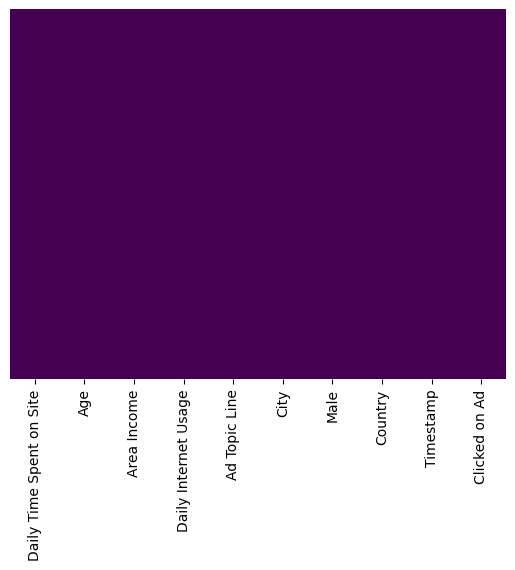

In [6]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0.5, 0, 'Age')

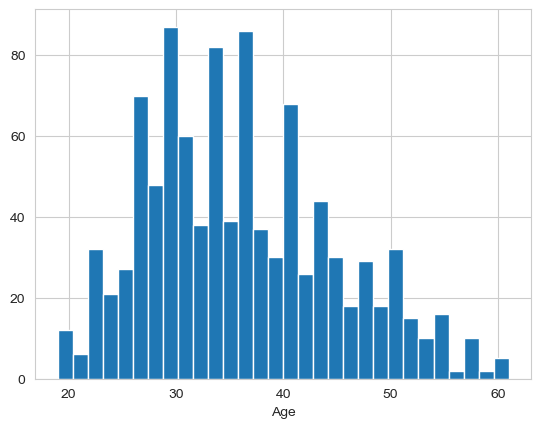

In [7]:
sns.set_style('whitegrid')
df['Age'].hist(bins=30)
plt.xlabel('Age')

The above count plot created by seaborn displays the number of clicks sorted by age. The graphs imply that approximately a great number of people clicking on advertisements are in the age group of 29–50 years. The common consensus on the number of people using electronic devices such as personal computers and smartphones in the age groups over 50 is low, hence the number of clicks will also be less.

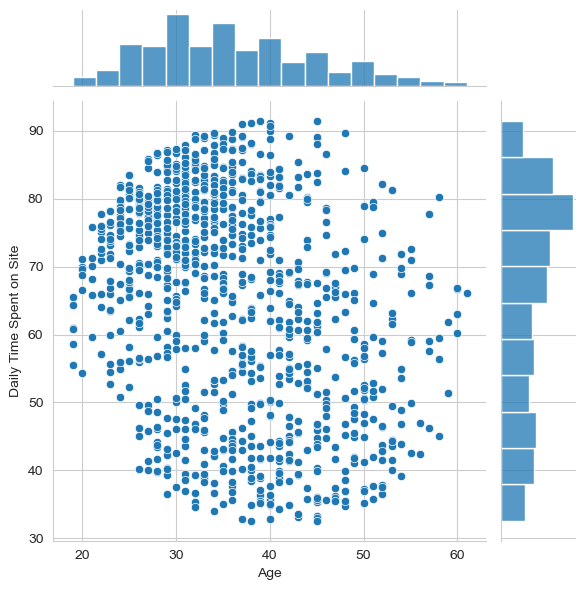

In [8]:
# Jointplot of daily time spent on site and age 
sns.jointplot(x = "Age", y= "Daily Time Spent on Site", data = df) 

#### In the above scatterplot we can see that there's a strong correlation between the "Daily Time Spent on Site" and "Age" column

We can see that more people aged between 30 to 40 are spending more time on site daily.

<Axes: xlabel='Age', ylabel='Daily Time Spent on Site'>

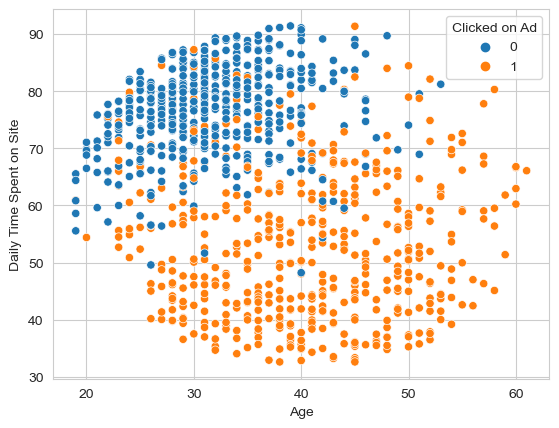

In [9]:
# scatterplot of daily time spent on site and age with clicking ads as hue
sns.scatterplot(x = "Age", y= "Daily Time Spent on Site",hue='Clicked on Ad', data = df) 

We can see that more people aged between 35 to 40 are spending more time on site daily but less chances of them to click on the ads.

<Axes: xlabel='Age', ylabel='Daily Internet Usage'>

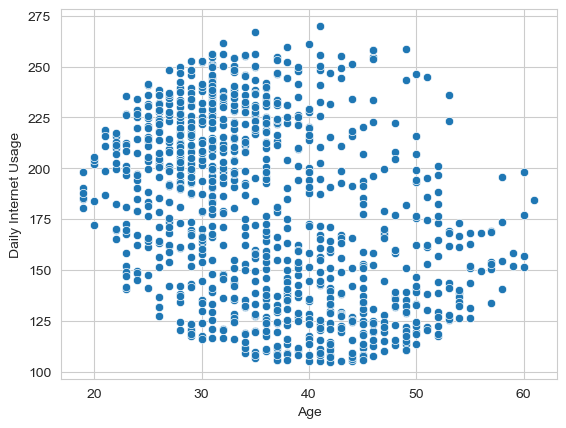

In [10]:
sns.scatterplot(x='Age', y='Daily Internet Usage', data=df)

#### In the above scatterplot we can see that it is almost similar to the first one.

### Visualize Target Variable


<Axes: xlabel='Clicked on Ad', ylabel='count'>

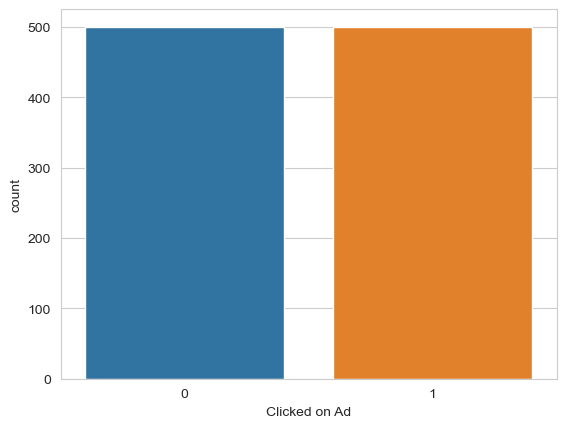

In [11]:
sns.countplot(x = 'Clicked on Ad', data = df)

In [12]:
df.drop(['City', 'Country', 'Ad Topic Line'],axis=1,inplace=True)

In [13]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,0,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,1,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,0,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,1,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,0,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,2016-02-11 21:49:00,1
996,51.30,45,67782.17,134.42,1,2016-04-22 02:07:01,1
997,51.63,51,42415.72,120.37,1,2016-02-01 17:24:57,1
998,55.55,19,41920.79,187.95,0,2016-03-24 02:35:54,0


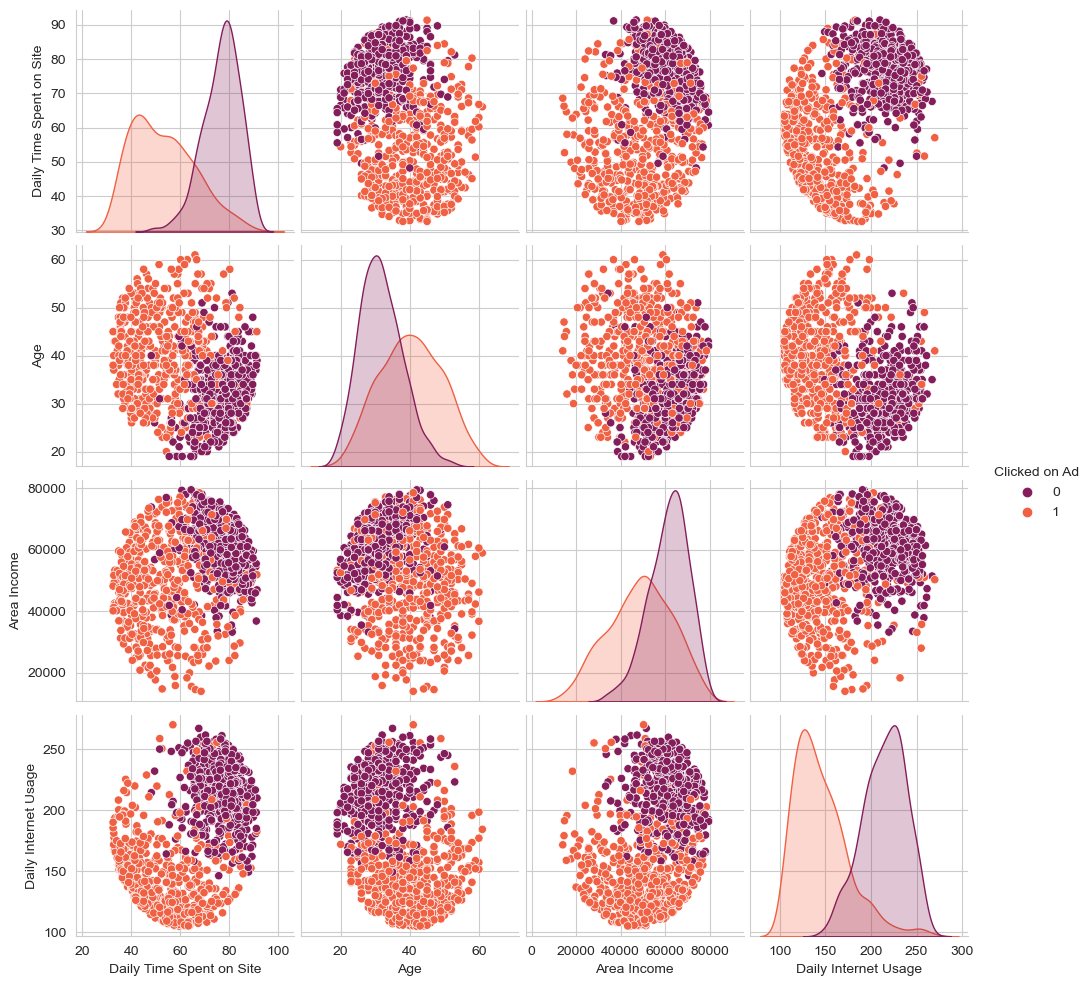

In [14]:
# Creating a pairplot with hue defined by Clicked on Ad column
sns.pairplot(df, hue = 'Clicked on Ad', vars = ['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage'],palette = 'rocket')

Pairplot represents the relationship between our target feature/variable and explanatory variables. It provides the possible direction of the relationship between the variables. We can see that people who spend less time on site and have less income and are aged more relatively are tend to click on ad.

In [15]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Year'] = df['Timestamp'].dt.year
df['Month'] = df['Timestamp'].dt.month
df['Day'] = df['Timestamp'].dt.day
df['Hour'] = df['Timestamp'].dt.hour
df['Minute'] = df['Timestamp'].dt.minute
df['Second'] = df['Timestamp'].dt.second

df.drop(columns=['Timestamp'], inplace=True)

In [16]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Year,Month,Day,Hour,Minute,Second
0,68.95,35,61833.90,256.09,0,0,2016,3,27,0,53,11
1,80.23,31,68441.85,193.77,1,0,2016,4,4,1,39,2
2,69.47,26,59785.94,236.50,0,0,2016,3,13,20,35,42
3,74.15,29,54806.18,245.89,1,0,2016,1,10,2,31,19
4,68.37,35,73889.99,225.58,0,0,2016,6,3,3,36,18
...,...,...,...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,2016,2,11,21,49,0
996,51.30,45,67782.17,134.42,1,1,2016,4,22,2,7,1
997,51.63,51,42415.72,120.37,1,1,2016,2,1,17,24,57
998,55.55,19,41920.79,187.95,0,0,2016,3,24,2,35,54


In [17]:
df.drop(['Second', 'Minute','Year' ],axis=1,inplace=True)

In [18]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour
0,68.95,35,61833.90,256.09,0,0,3,27,0
1,80.23,31,68441.85,193.77,1,0,4,4,1
2,69.47,26,59785.94,236.50,0,0,3,13,20
3,74.15,29,54806.18,245.89,1,0,1,10,2
4,68.37,35,73889.99,225.58,0,0,6,3,3
...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,1,2,11,21
996,51.30,45,67782.17,134.42,1,1,4,22,2
997,51.63,51,42415.72,120.37,1,1,2,1,17
998,55.55,19,41920.79,187.95,0,0,3,24,2


In [19]:
columns_to_log_transform = ['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage']
for column_name in columns_to_log_transform:
    df[column_name] = np.log(df[column_name] + 1)  # Adding +1 to avoid log(0)

In [20]:
df

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad,Month,Day,Hour
0,4.247781,3.583519,11.032223,5.549426,0,0,3,27,0
1,4.397285,3.465736,11.133754,5.271819,1,0,4,4,1
2,4.255187,3.295837,10.998543,5.470168,0,0,3,13,20
3,4.319486,3.401197,10.911576,5.508943,1,0,1,10,2
4,4.239454,3.583519,11.210346,5.423098,0,0,6,3,3
...,...,...,...,...,...,...,...,...,...
995,4.303660,3.433987,11.175851,5.345106,1,1,2,11,21
996,3.956996,3.828641,11.124069,4.908381,1,1,4,22,2
997,3.963286,3.951244,10.655298,4.798844,1,1,2,1,17
998,4.035125,2.995732,10.643561,5.241482,0,0,3,24,2


#### Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

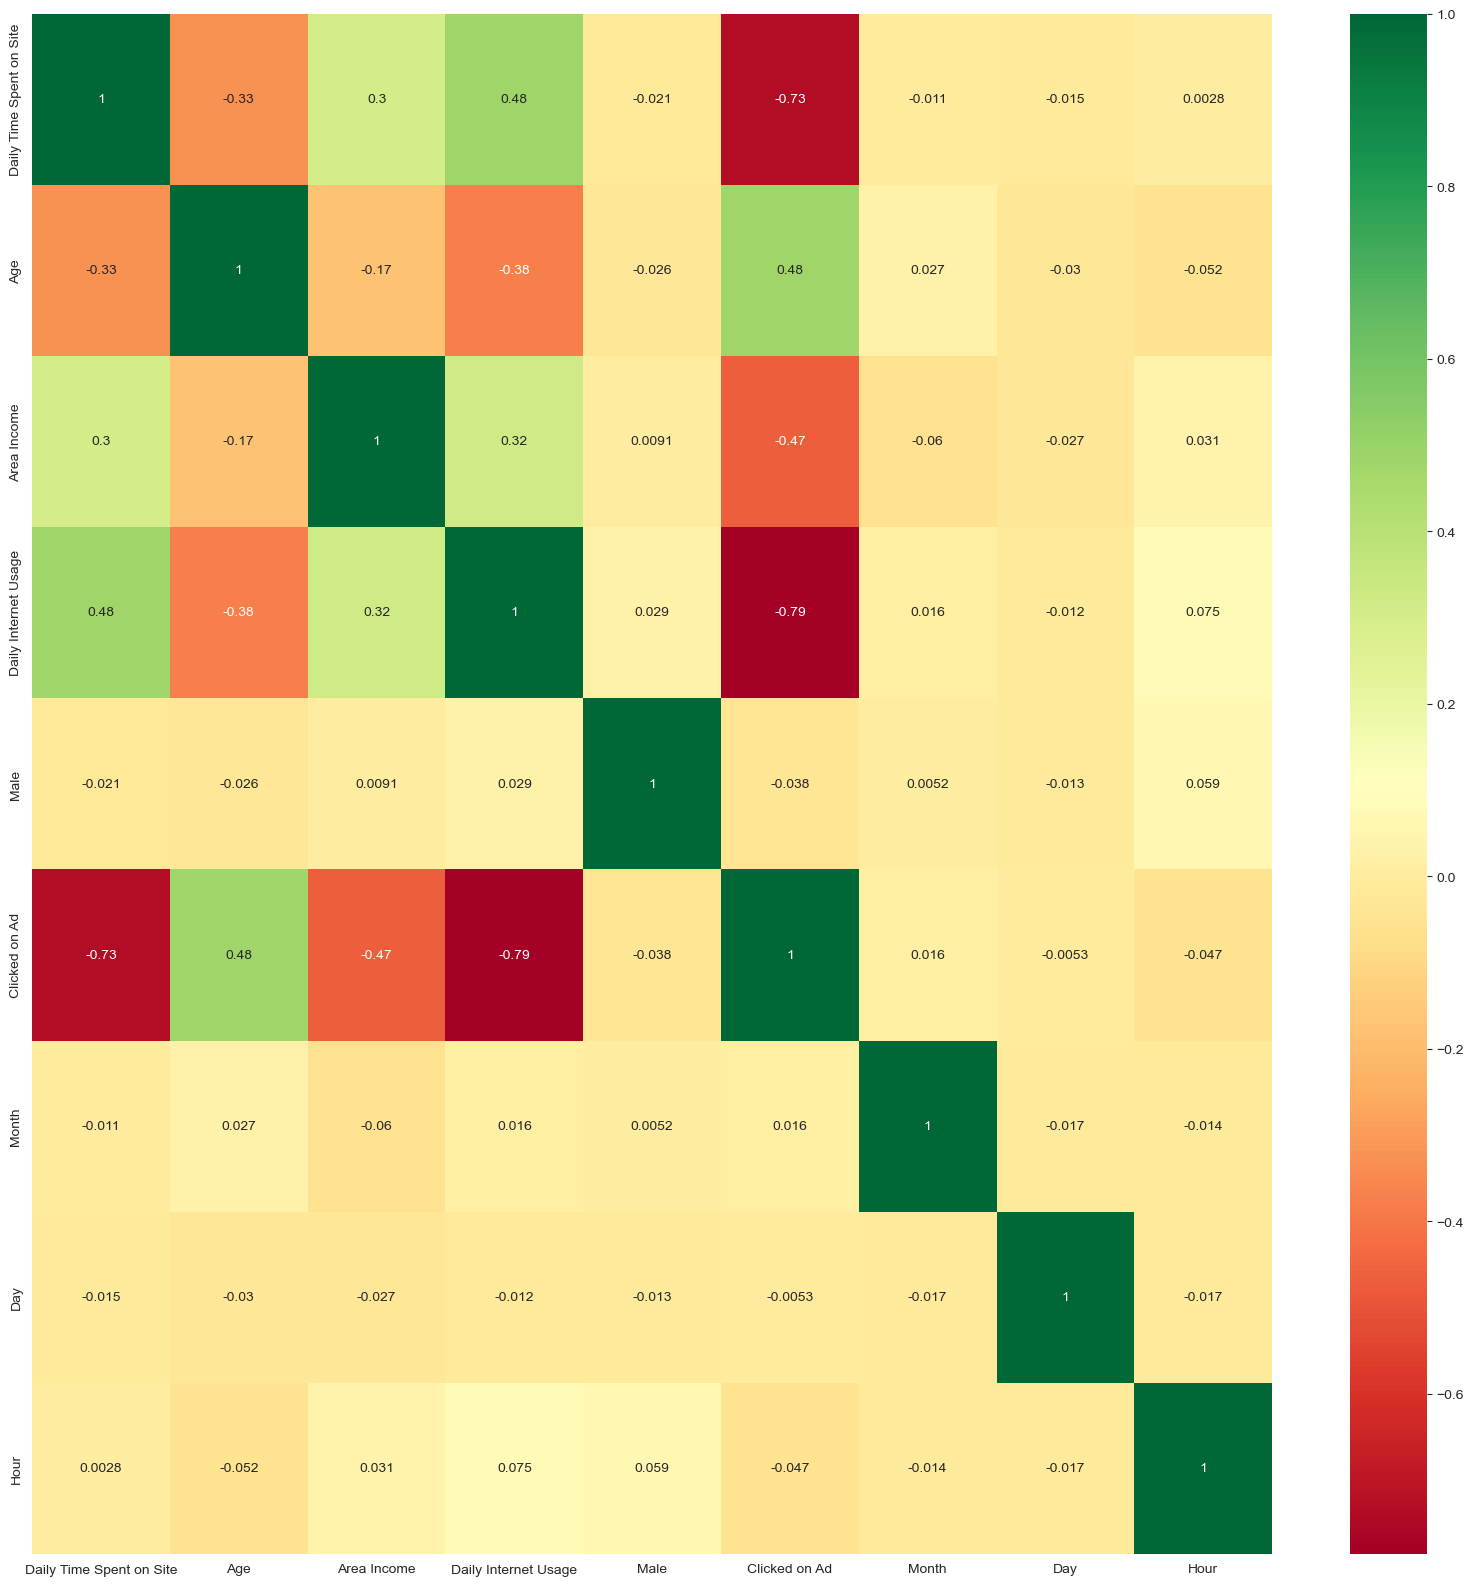

In [21]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Heatmap gives us better understanding of relationship between each feature. Correlation is measured between -1 and 1. Higher the absolute value, higher is the degree of correlation between the variables. We expect daily internet usage and daily time spent on site to be more correlated with our target variable. Also, none of our explantory variables seems to correlate with each other which indicates there is no collinearity in our data.

#### Lets train the model now

##### Splitting the data into training set and testing set using train_test_split

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss

In [23]:
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male','Month','Day','Hour']]
y = df['Clicked on Ad']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#### Now lets Train and Teast a Random Forest model on the training set

In [56]:
from sklearn.ensemble import RandomForestClassifier

In [101]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth= 9)

In [102]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, random_state=42)

In [103]:
y_pred = rf_model.predict(X_test)

In [106]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
lloss= log_loss(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)
print("log loss:", lloss)

Accuracy: 0.9545454545454546

Confusion Matrix:
 [[156   6]
 [  9 159]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.96      0.95       162
           1       0.96      0.95      0.95       168

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330

log loss: 1.638347881323507


##### Lets try Logistic Regression and check the results.

In [61]:
from sklearn.linear_model import LogisticRegression

In [119]:
logmodel = LogisticRegression(penalty='l2',multi_class="ovr")
logmodel.fit(X_train,y_train)

C:\Users\Nayan\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(multi_class='ovr')

##### Now predict values for the testing data.

In [63]:
predictions = logmodel.predict(X_test)

##### Lets Create a classification report of  our model.

In [65]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       162
           1       0.99      0.92      0.95       168

    accuracy                           0.95       330
   macro avg       0.95      0.95      0.95       330
weighted avg       0.95      0.95      0.95       330



In [108]:
accuracy_score(y_test, predictions)

0.9515151515151515

In [109]:
confusion_matrix(y_test, predictions)

array([[160,   2],
       [ 14, 154]], dtype=int64)

In [110]:
log_loss(y_test, predictions)

1.7475710734117407

Looking at the provided classification reports for Logistic Regression and Random Forest models, both models seem to perform similarly in terms of accuracy and overall F1-score.

However, there are slight differences in precision and recall values.

Considering precision, recall, and F1-score for both classes, it appears that the Random Forest model has slightly higher precision and recall for both classes compared to Logistic Regression. Therefore, based on the provided metrics, the Random Forest model may be considered slightly better for this specific dataset.


#### Confusion Matrix:

The users that are predicted to click on commercials and the actually clicked users were 156, the people who were predicted not to click on the commercials and actually did not click on them were 159.

The people who were predicted to click on commercial and actually did not click on them are 6, and the users who were not predicted to click on the commercials and actually clicked on them are 9.

We have only a few mislabelled points which is not bad from the given size of the dataset.

#### Classification Report:

Precision: For class 0 (not clicking on the ad), the precision was 95%, and for class 1 (clicking on the ad), it was 96%. This indicates that the model has a high precision for both classes, meaning that when it predicts an instance as positive (clicking on the ad), it is correct around 95-96% of the time. 

Recall:  For class 0, the recall was 96%, and for class 1, it was 95%. This suggests that the model effectively captures the majority of positive instances for both classes.

F1-score: The F1-score for both classes was 95%, indicating a good balance between precision and recall for both classes.

#### Log Loss Report:

Log loss values typically range from 0 to positive infinity. A log loss of 1.6383 indicates that, on average, the model's predicted probabilities diverge from the true labels by approximately 1.6383 bits per sample.


### Conclusion

In conclusion, the Random Forest model performed well across all evaluation metrics, demonstrating high accuracy, precision, recall, and F1-score for both classes. With an accuracy of 95% and balanced performance across multiple metrics, the Random Forest model appears to be effective in predicting whether a user will click on an ad based on the given features.

## Bingo! We've scored a 95% of accuracy 